In [7]:
from scipy import misc
import glob
from skimage import io
from skimage.transform import resize
import math
import matplotlib.pyplot as plt
import numpy as np
import pprint as pp
%matplotlib inline

In [8]:
images = []

for image_path in glob.glob("dane/set0/*.png"):
    image = io.imread(image_path, as_gray=True)
    images.append(image)

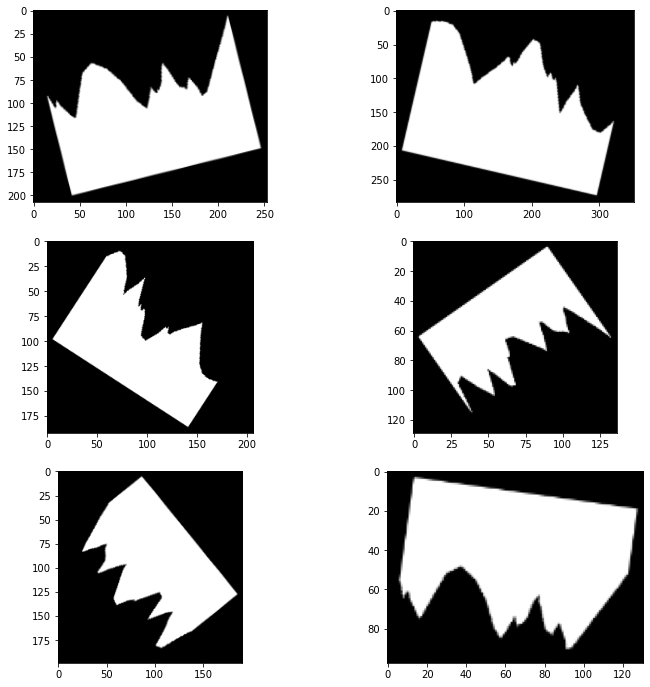

In [9]:
fig, axs = plt.subplots(3,2, figsize=(12,12))

for index, image in enumerate(images):
    axs[math.floor(index / 2),index % 2].imshow(image, cmap='gray', vmin=0, vmax=255) 


In [10]:
numpyImages = []
for image in images:
    numpyImages.append(np.array(image))

<Figure size 432x288 with 0 Axes>

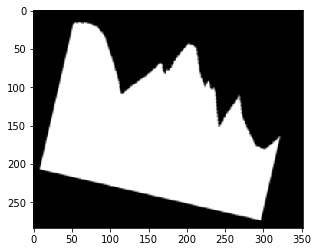

<Figure size 432x288 with 0 Axes>

In [19]:
import numpy as np
import cv2
import math
from scipy import ndimage

img_before = images[1]

plt.imshow(img_before, cmap='gray', interpolation='nearest')
plt.figure()



<Figure size 432x288 with 0 Axes>

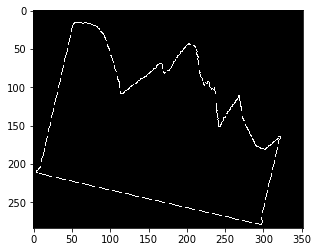

<Figure size 432x288 with 0 Axes>

In [31]:
img_gray = img_before
img_edges = cv2.Canny(img_gray, 100, 100, apertureSize=3)
plt.imshow(img_edges, cmap='gray', interpolation='nearest')
plt.figure()

In [58]:
img_edges

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
lines = cv2.HoughLinesP(img_edges, 1, math.pi / 180.0, 100, minLineLength=100, maxLineGap=5)

angles = []

pp.pprint(lines)

for x1, y1, x2, y2 in lines[0]:
    cv2.line(img_before, (x1, y1), (x2, y2), (255, 0, 0), 3)
    angle = math.degrees(math.atan2(y2 - y1, x2 - x1))
    angles.append(angle)

median_angle = np.median(angles)
img_rotated = ndimage.rotate(img_before, median_angle)

plt.imshow(img_rotated, cmap='gray', interpolation='nearest')
plt.figure()

<Figure size 432x288 with 0 Axes>

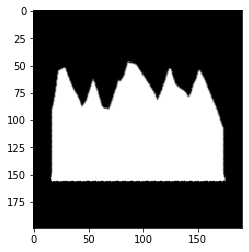

<Figure size 432x288 with 0 Axes>

In [32]:
import imutils
rotated = imutils.rotate(img_before, median_angle + 180)

plt.imshow(rotated, cmap='gray', interpolation='nearest')
plt.figure()

NameError: name 'centers' is not defined

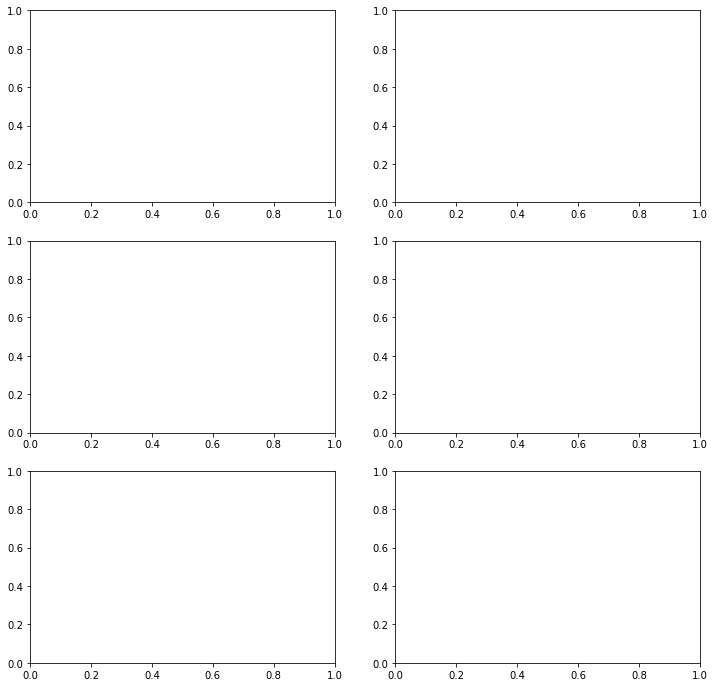

In [26]:
contours = []



for image in numpyImages:    
    contours.append(find_contours(image,0.5))
    test_contours = np.floor(contours[0])
    
fig, axs = plt.subplots(3,2, figsize=(12,12))

index = 0

for image, center, contour in zip(numpyImages, centers, contours):
    axs[math.floor(index / 2),index % 2].imshow(image, cmap='gray', vmin=0, vmax=255) 
    axs[math.floor(index / 2),index % 2].scatter(center[1],center[0],color='r')
    for n, cnt in enumerate(contour):
        axs[math.floor(index / 2),index % 2].plot(cnt[:, 1], cnt[:, 0], linewidth=2)
    index += 1  

In [27]:
pp.pprint()

[array([[201.5       ,  43.        ],
       [201.9       ,  42.        ],
       [201.875     ,  41.        ],
       ...,
       [200.99444444,  44.        ],
       [201.        ,  43.5       ],
       [201.5       ,  43.        ]])]


In [30]:
lines = cv2.HoughLinesP(contours[0], 1, math.pi / 180.0, 100, minLineLength=100, maxLineGap=5)

TypeError: Expected Ptr<cv::UMat> for argument 'image'

In [5]:
def centerOfMass(image):
    SumX = 0
    SumY = 0
    num  = 0
    
    imageWidth, imageHeight = image.shape
    
    for i in range(imageWidth):
        for j in range(imageHeight):
            SumX += i * image[i,j]
            SumY += j * image[i,j]
            num += image[i,j]


    SumX = SumX / num;
    SumY = SumY / num;
    # The coordinate (SumX,SumY) is the center of the image mass
    return (SumX,SumY)


In [25]:
import imageio as iio
from skimage import filters
from skimage.measure import regionprops

from skimage.measure import find_contours


In [7]:
def centerOfMass2(image):
    threshold_value = filters.threshold_otsu(image)
    labeled_foreground = (image > threshold_value).astype(int)
    properties = regionprops(labeled_foreground, image)
    center_of_mass = properties[0].centroid
    weighted_center_of_mass = properties[0].weighted_centroid

    return center_of_mass

In [8]:
def centerOfMass3(image):
    X, Y = image.shape
    m = np.zeros((X, Y))
    for x in range(X):
        for y in range(Y):
            m[x, y] = all(image[x, y] != (0, 0, 0))
    m = m / np.sum(np.sum(m))


    dx = np.sum(m, 1)
    dy = np.sum(m, 0)

    cx = np.sum(dx * np.arange(X))
    cy = np.sum(dy * np.arange(Y))
    
    return (cx, cy)

In [9]:
centers = []
for image in numpyImages:
    centers.append(centerOfMass3(image))

In [10]:
centers

[(123.02090545938748, 130.5975588104749),
 (158.69839988100046, 157.56146539450432),
 (102.81453037401123, 88.44697027878047),
 (54.50931899641577, 61.982974910394276),
 (93.30793272808454, 103.22890311058175),
 (41.1828231292517, 66.03287981859413)]

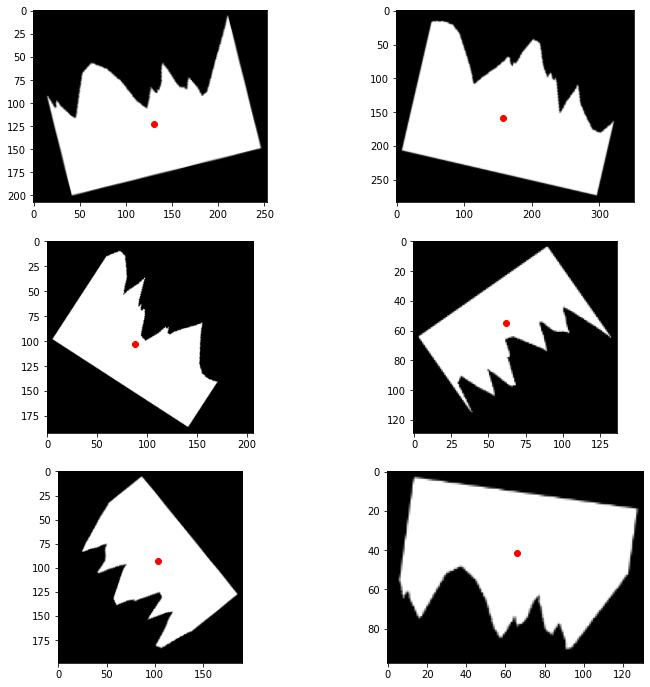

In [11]:
fig, axs = plt.subplots(3,2, figsize=(12,12))

index = 0

for image, center in zip(numpyImages, centers):
    axs[math.floor(index / 2),index % 2].imshow(image, cmap='gray', vmin=0, vmax=255) 
    axs[math.floor(index / 2),index % 2].scatter(center[1],center[0],color='r')
    index += 1

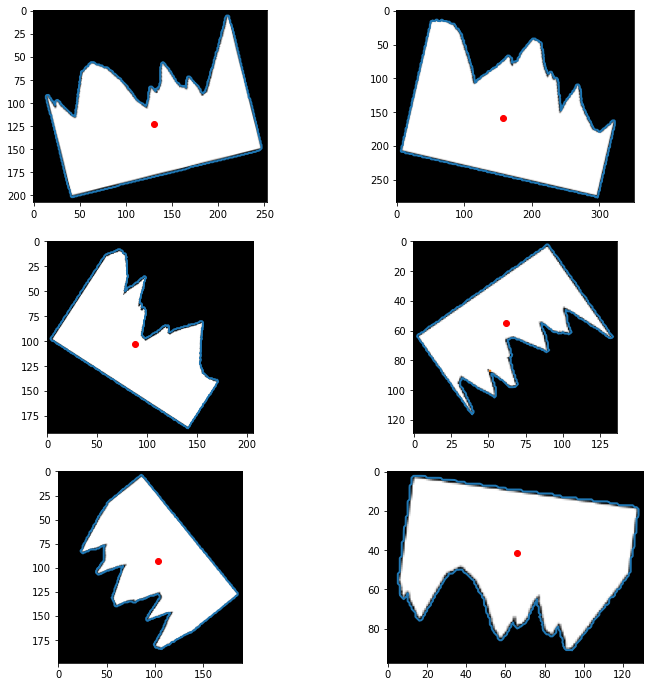

In [12]:


contours = []



for image in numpyImages:    
    contours.append(find_contours(image,0.5))
    test_contours = np.floor(contours[0])
    
fig, axs = plt.subplots(3,2, figsize=(12,12))

index = 0

for image, center, contour in zip(numpyImages, centers, contours):
    axs[math.floor(index / 2),index % 2].imshow(image, cmap='gray', vmin=0, vmax=255) 
    axs[math.floor(index / 2),index % 2].scatter(center[1],center[0],color='r')
    for n, cnt in enumerate(contour):
        axs[math.floor(index / 2),index % 2].plot(cnt[:, 1], cnt[:, 0], linewidth=2)
    index += 1  
    


In [187]:
#plan
# zrobić histogram tak jak na wykładzie
# sprawidzić wyniki
# jak nie będą wystarczajaco dobre, to obrócić i znormalizować (wielkosć) obrazki
# Sprawdzić jak działaja momenty HU
# można zrobic regresję liniową na punktach skrajnych (wierzchołki i doliny) i je porównywać


In [83]:
pixelContours = []

neighborhood = [(-1,-1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]

for image in numpyImages:
    pixC = []
    for row, line in enumerate(image):
        for column, pixel in enumerate(line):
            if(pixel == 0):
                continue
            for x,y in neighborhood:
                try:
                    if image[row + x, column + y] == 0:
                        pixC.append((row, column))
                        break
                except:
                    print("err")
    pixelContours.append(pixC)
                
                
            

In [96]:
contursMaps = []
for image in numpyImages:
    contursMaps.append(np.zeros(image.shape, dtype="uint8"))

In [97]:
for index, image in enumerate(numpyImages):
    for r, line in enumerate(contursMaps[index]):
        for c, _ in enumerate(line):
            if((r,c) in pixelContours[index]):
                contursMaps[index][r,c] = 1

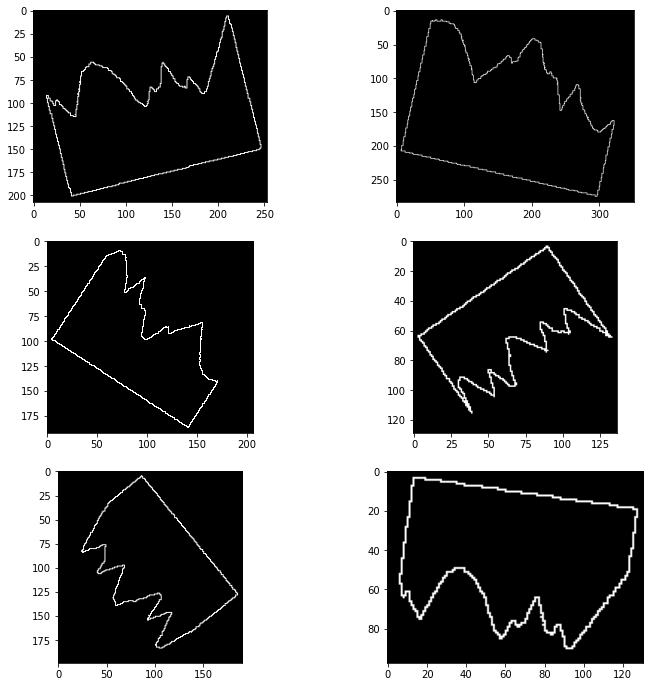

In [98]:
fig, axs = plt.subplots(3,2, figsize=(12,12))
index = 0
for image in contursMaps:
    axs[math.floor(index / 2),index % 2].imshow(image, cmap='gray', vmin=0, vmax=1) 
    index += 1

In [129]:
lines = cv2.HoughLinesP(contursMaps[2], 1, math.pi / 180.0, 100, minLineLength=50, maxLineGap=5)

In [130]:
lines

array([[[  2,  98, 146, 188]],

       [[  1,  99, 145, 189]],

       [[  2,  95, 137, 182]],

       [[  1, 101, 144, 190]],

       [[  4,  94, 145, 186]],

       [[  1, 102, 142, 190]]], dtype=int32)

array([[[  2,  98, 146, 188]],

       [[  1,  99, 145, 189]],

       [[  2,  95, 137, 182]],

       [[  1, 101, 144, 190]],

       [[  4,  94, 145, 186]],

       [[  1, 102, 142, 190]]], dtype=int32)


<Figure size 432x288 with 0 Axes>

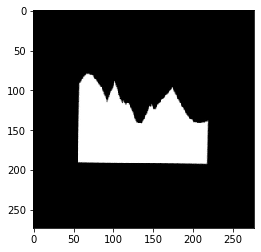

<Figure size 432x288 with 0 Axes>

In [131]:
angles = []

pp.pprint(lines)

for x1, y1, x2, y2 in lines[0]:
    cv2.line(contursMaps[2], (x1, y1), (x2, y2), (255, 0, 0), 3)
    angle = math.degrees(math.atan2(y2 - y1, x2 - x1))
    angles.append(angle)

median_angle = np.median(angles)
img_rotated = ndimage.rotate(numpyImages[2], median_angle)

plt.imshow(img_rotated, cmap='gray', interpolation='nearest')
plt.figure()

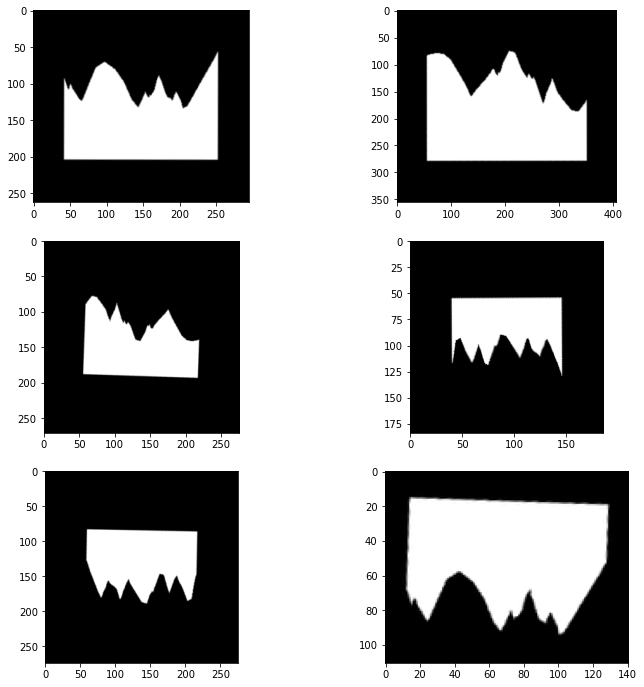

In [137]:
fig, axs = plt.subplots(3,2, figsize=(12,12))

index = 0

imgs_rotated = []

for image, contursMap in zip(numpyImages, contursMaps):
    
    angles = []
    
    lines = cv2.HoughLinesP(contursMap, 1, math.pi / 180.0, 100, minLineLength=50, maxLineGap=5)
    for x1, y1, x2, y2 in lines[0]:
        cv2.line(contursMap, (x1, y1), (x2, y2), (255, 0, 0), 3)
        angle = math.degrees(math.atan2(y2 - y1, x2 - x1))
        angles.append(angle)
        
    median_angle = np.median(angles)
    imgs_rotated.append(ndimage.rotate(image, median_angle))
    
    axs[math.floor(index / 2),index % 2].imshow(imgs_rotated[-1], cmap='gray', vmin=0, vmax=255) 
    index += 1  
    

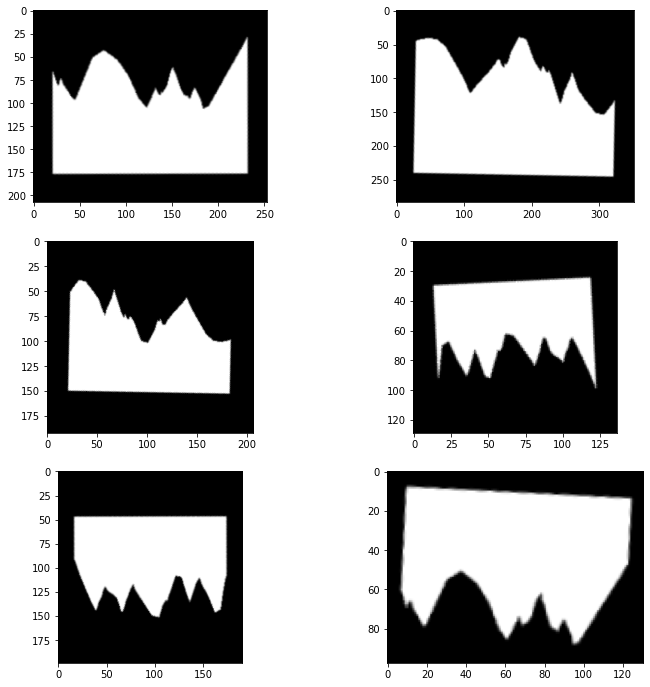

In [139]:
fig, axs = plt.subplots(3,2, figsize=(12,12))
import imutils
index = 0

imgs_rotated = []

for image, contursMap in zip(numpyImages, contursMaps):
    
    angles = []
    
    lines = cv2.HoughLinesP(contursMap, 1, math.pi / 180.0, 100, minLineLength=50, maxLineGap=5)
    for x1, y1, x2, y2 in lines[0]:
        cv2.line(contursMap, (x1, y1), (x2, y2), (255, 0, 0), 3)
        angle = math.degrees(math.atan2(y2 - y1, x2 - x1))
        angles.append(angle)
        
    median_angle = np.median(angles)
    imgs_rotated.append(imutils.rotate(image, median_angle))
    
    axs[math.floor(index / 2),index % 2].imshow(imgs_rotated[-1], cmap='gray', vmin=0, vmax=255) 
    index += 1  
    

In [144]:
def check_orient(image):
    height, width = image.shape
    # width, height = image.shape
    divider = 2
    black_pxls = []
    black_pxls.append(np.sum(image[:height // divider, :] == 0))  # up
    black_pxls.append(np.sum(image[(divider - 1) * (height // divider):, :] == 0))  # down
    side = black_pxls.index(max(black_pxls))
    # print(black_pxls)
    if side == 0:
        return cv2.rotate(image, cv2.ROTATE_180)
    
    return image

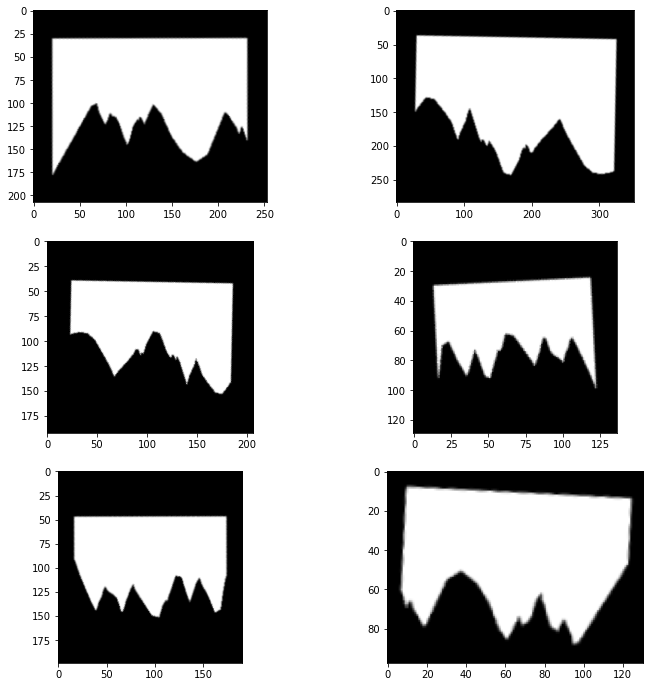

In [184]:
fig, axs = plt.subplots(3,2, figsize=(12,12))
index = 0

imgs_fliped = []

for image in imgs_rotated:
    
    imgs_fliped.append(check_orient(image))   
    axs[math.floor(index / 2),index % 2].imshow(imgs_fliped[-1], cmap='gray', vmin=0, vmax=255) 
    
    index += 1 

In [185]:
def cut_background(image):
    
    upIndex = 0
    leftIndex = 0
    rightIndex = 0
    downIndex = 0
    
    for ind, row in enumerate(image):
        if any(row) > 0:
            upIndex = ind
            break
            
    for ind, column in enumerate(image.T):
        if any(column) > 0:
            leftIndex = ind
            break  
            
    for ind, row in enumerate(np.flip(image)):
        if any(row) > 0:
            downIndex = ind
            break
            
    for ind, column in enumerate(np.flip(image.T)):
        if any(column) > 0:
            rightIndex = ind
            break     

    print(upIndex, downIndex, leftIndex, rightIndex)
            
    newImage = image[upIndex:image.shape[0] - downIndex]
    
    print(image.shape)
    print(newImage.shape)
    
    newImage = np.delete(newImage, np.s_[newImage.shape[1] - rightIndex:newImage.shape[1]], 1) #column
    newImage = np.delete(newImage, np.s_[0:leftIndex], 1)
    
    print(newImage.shape)
    
    return newImage

28 28 19 19
(208, 253)
(152, 253)
(152, 215)
35 38 26 23
(284, 352)
(211, 352)
(211, 303)
38 37 22 19
(192, 207)
(117, 207)
(117, 166)
23 29 12 13
(129, 137)
(77, 137)
(77, 112)
45 46 15 15
(199, 191)
(108, 191)
(108, 161)
7 9 6 5
(98, 131)
(82, 131)
(82, 120)


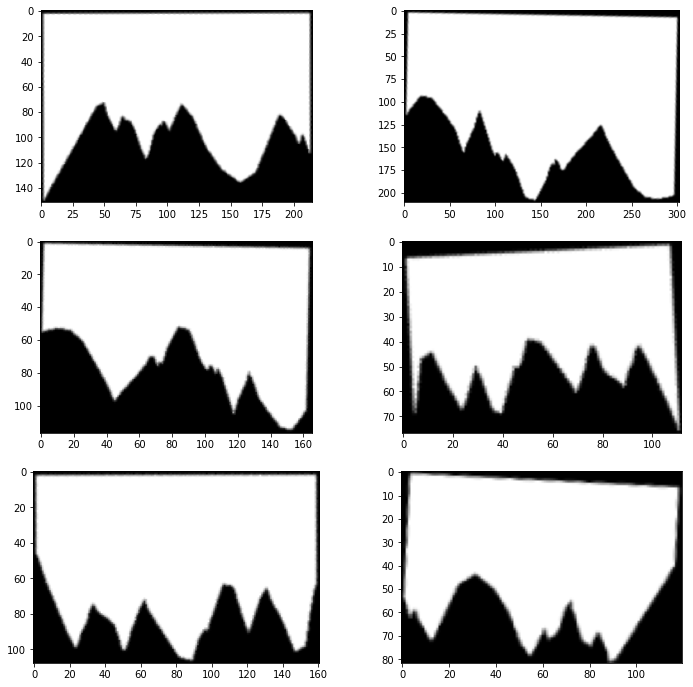

In [188]:
fig, axs = plt.subplots(3,2, figsize=(12,12))
index = 0
cutted_images = []
for image in imgs_fliped:
        
    cutted_images.append(cut_background(image))
    axs[math.floor(index / 2),index % 2].imshow(cutted_images[-1], cmap='gray', vmin=0, vmax=255) 
    index += 1 

In [210]:
def cut_white_block(image):

    downIndex = 0
          
    height, width = image.shape
        
    accuracy = 0.02

    for ind, row in enumerate(np.flip(image)):
        
        left = int(width*accuracy)
        right = int(width-(width*accuracy))
        
        if all(row[left:right]) > 0:
            downIndex = ind
            break

    
    newImage = image[height - downIndex:]
    
    return newImage

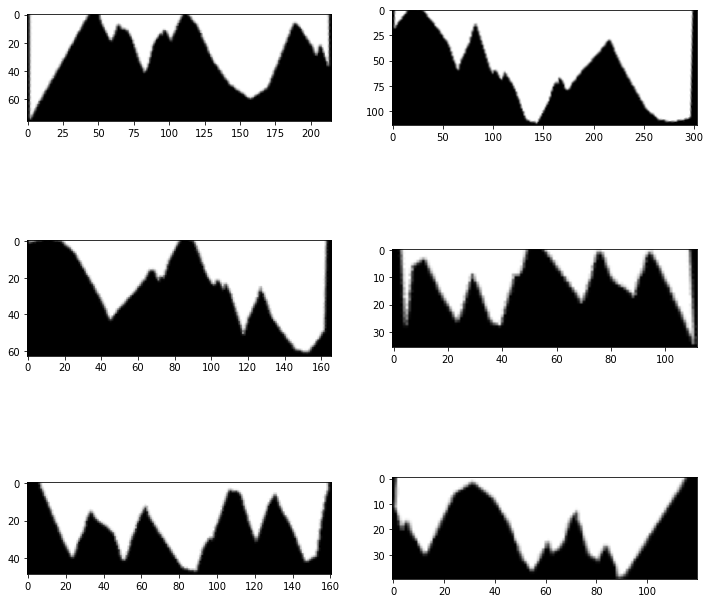

In [213]:
fig, axs = plt.subplots(3,2, figsize=(12,12))
index = 0


ready_images = []

for image in cutted_images:
    
    ready_images.append(cut_white_block(image))
        
    axs[math.floor(index / 2),index % 2].imshow(ready_images[-1], cmap='gray', vmin=0, vmax=255) 
    index += 1 

In [224]:
minHeight = None
minWidth = None

for image in ready_images:
    h,w = image.shape
    
    if minHeight == None or h < minHeight:
        minHeight = h
        
    if minWidth == None or w < minWidth:
        minWidth = w
    
resized_images = []
for image in ready_images:
    resized_images.append(cv2.resize(image, dsize=(minWidth, minHeight), interpolation=cv2.INTER_CUBIC))

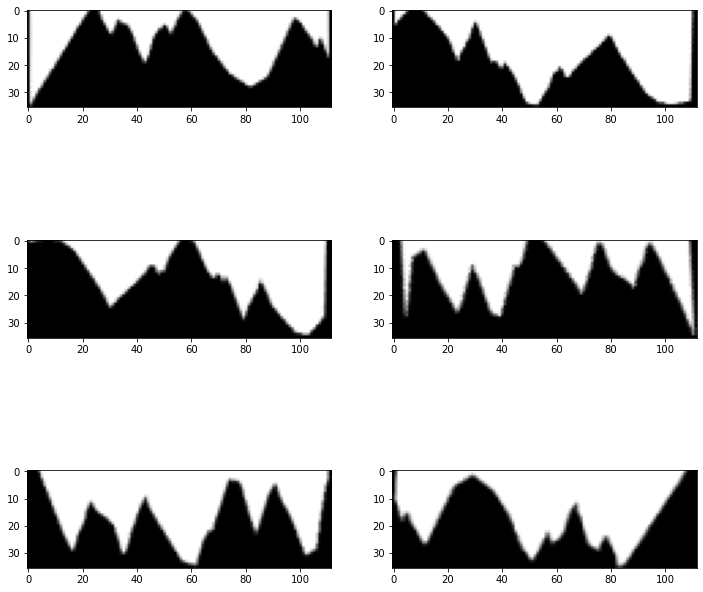

In [234]:
fig, axs = plt.subplots(3,2, figsize=(12,12))
index = 0

for image in resized_images:
            
    axs[math.floor(index / 2),index % 2].imshow(image, cmap='gray', vmin=0, vmax=255) 
    index += 1 

In [237]:
resized_images[0]

array([[ 24, 233, 255, ..., 255, 209,   6],
       [ 20, 236, 255, ..., 255, 216,   3],
       [ 26, 231, 255, ..., 255, 209,   4],
       ...,
       [  9, 239,  76, ...,   0,   0,   0],
       [ 21, 148,  16, ...,   0,   0,   0],
       [  3,  45,   0, ...,   0,   0,   0]], dtype=uint8)

<Figure size 432x288 with 0 Axes>

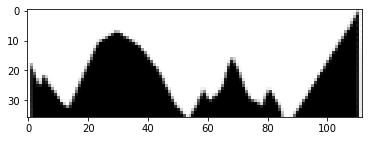

<Figure size 432x288 with 0 Axes>

In [238]:
plt.imshow(np.flip(255 - resized_images[0]), cmap='gray', interpolation='nearest')
plt.figure()

In [245]:
def conutSimilarity(image1, image2):
    
    number_of_equal_elements = np.sum(image1==image2)
    total_elements = image1.shape[0] * image1.shape[1]
    percentage = number_of_equal_elements/total_elements
    
    return percentage
    

In [251]:
def howManyDifferent(image1, image2):
    n = np.sum(image1 - image2)
    return n

In [272]:
def conutSimilarityTest(image1, image2):
    
    maxDiff = 0.1 * 255
    
    equal = 0
    
    for row1, row2 in zip(image1, image2):
        for p1, p2 in zip(row1, row2):
            if p2 > p1:
                if p2 - maxDiff <= p1:
                    equal += 1
            else:
                 if p1 - maxDiff <= p2:
                    equal += 1               
             
            
    total_elements = image1.shape[0] * image1.shape[1]
    percentage = equal/total_elements
    
    return percentage
    

In [273]:
conutSimilarity(a,b)

0.8

In [274]:
255*0.9

229.5

In [275]:
for image in resized_images[1:]:
    print(conutSimilarityTest(np.flip(255 - resized_images[0]),image))

0.6341765873015873
0.5024801587301587
0.45907738095238093
0.6096230158730159
0.7837301587301587


In [276]:
for image in resized_images[1:]:
    print(conutSimilarity(np.flip(255 - resized_images[0]),image))

0.59375
0.4635416666666667
0.3978174603174603
0.5535714285714286
0.7338789682539683


In [282]:



for index, image in enumerate(resized_images):
    best = None
    for index2, image2 in enumerate(resized_images):
        if index == index2:
            continue
        sim = conutSimilarity(np.flip(255 - image),image2)

        if best == None or sim > best:
            best = sim
            bestIndex = index2
            
            
    print(index, "most similar to", bestIndex)

0 most similar to 5
1 most similar to 2
2 most similar to 1
3 most similar to 4
4 most similar to 3
5 most similar to 0


In [283]:
tc = []

for x,y in test_contours:
    tc.append((int(x), int(y)))

In [284]:
test_contours

array([[201.,  43.],
       [201.,  42.],
       [201.,  41.],
       ...,
       [200.,  44.],
       [201.,  43.],
       [201.,  43.]])

In [73]:
contursMap_test = np.zeros(numpyImages[0].shape, dtype="uint8")
for r, line in enumerate(contursMap_test):
    for c, _ in enumerate(line):
        if((r,c) in tc):
            contursMap_test[r,c] = 255

<Figure size 432x288 with 0 Axes>

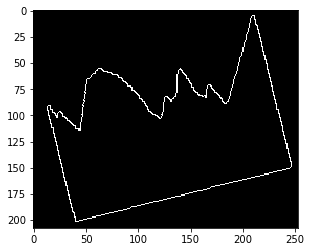

<Figure size 432x288 with 0 Axes>

In [74]:
plt.imshow(contursMap_test, cmap='gray', interpolation='nearest')
plt.figure()

In [75]:
type(contursMap_test)

numpy.ndarray

In [76]:
contursMap_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

array([[[ 40, 201, 245, 150]]], dtype=int32)

array([[[ 40, 201, 245, 150]]], dtype=int32)


<Figure size 432x288 with 0 Axes>

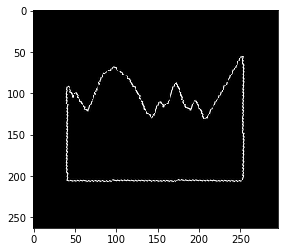

<Figure size 432x288 with 0 Axes>

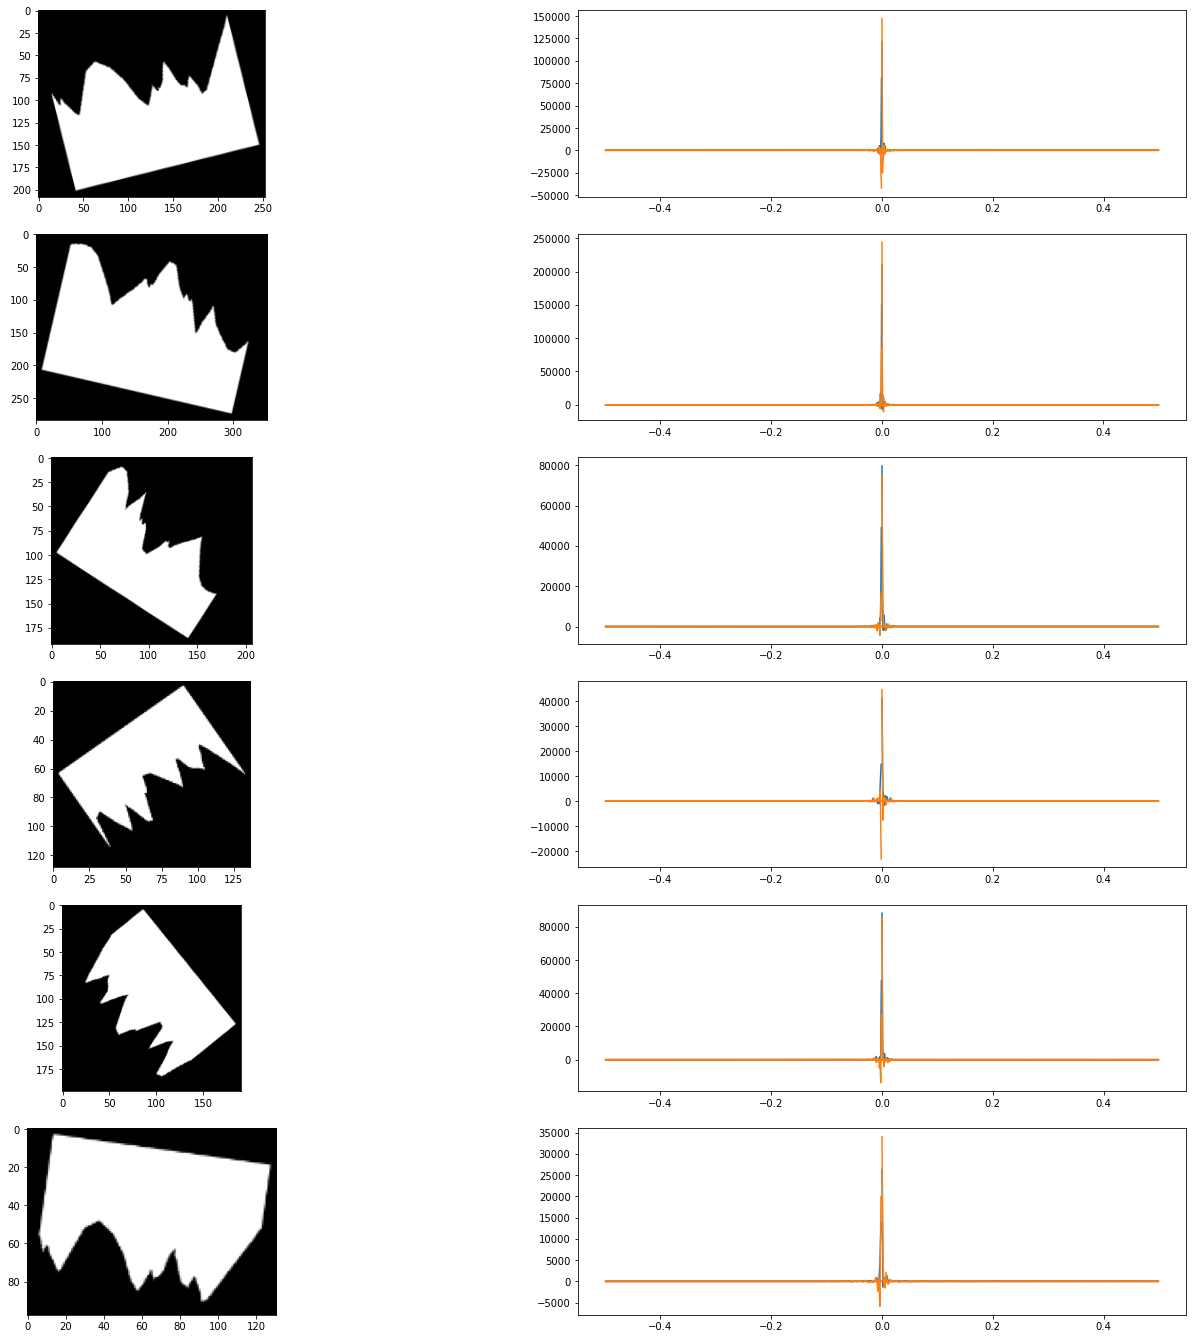

In [355]:
import pprint as pp
contours = []
contours_discrete = []
    
tc_complex = []



    
for image in numpyImages:  
    contours.append(np.floor(find_contours(image,0.5)[0]))
    
for c in contours:
    tc2 = []
    for x,y in c:
        tc2.append(x + 1j * y)
    tc2 = np.array(tc2)
    tc_complex.append(tc2)
    
fig, axs = plt.subplots(6,2, figsize=(24,24))

index = 0

for image, tcc in zip(numpyImages, tc_complex):
    
    axs[index, 0].imshow(image, cmap='gray', vmin=0, vmax=255) 
    
    sp = np.fft.fft(tcc)
    freq = np.fft.fftfreq(tcc.shape[-1])
    axs[index, 1].plot(freq, sp.real, freq, sp.imag)
    
    index += 1


In [385]:
import pprint as pp
import cv2

moms = []
    
for image in numpyImages:  
    moments = cv2.moments(image)
    huMoments = cv2.HuMoments(moments)
    moms.append(huMoments)


diffs = {}
    
for index, m in enumerate(moms):
    for index2, m2 in enumerate(moms):
        if(index != index2):
            diff = 0
            for e1, e2 in zip(m, m2):
                diff += abs(e1 - e2)
            diffs[(index, index2)] = diff
                

pp.pprint(diffs)

{(0, 1): array([9.38377696e-05]),
 (0, 2): array([3.27546479e-07]),
 (0, 3): array([3.5560457e-06]),
 (0, 4): array([0.00010853]),
 (0, 5): array([9.80164375e-05]),
 (1, 0): array([9.38377696e-05]),
 (1, 2): array([9.41652505e-05]),
 (1, 3): array([9.73938062e-05]),
 (1, 4): array([1.46892677e-05]),
 (1, 5): array([4.18141522e-06]),
 (2, 0): array([3.27546479e-07]),
 (2, 1): array([9.41652505e-05]),
 (2, 3): array([3.22860283e-06]),
 (2, 4): array([0.00010885]),
 (2, 5): array([9.8343963e-05]),
 (3, 0): array([3.5560457e-06]),
 (3, 1): array([9.73938062e-05]),
 (3, 2): array([3.22860283e-06]),
 (3, 4): array([0.00011208]),
 (3, 5): array([0.00010157]),
 (4, 0): array([0.00010853]),
 (4, 1): array([1.46892677e-05]),
 (4, 2): array([0.00010885]),
 (4, 3): array([0.00011208]),
 (4, 5): array([1.05105552e-05]),
 (5, 0): array([9.80164375e-05]),
 (5, 1): array([4.18141522e-06]),
 (5, 2): array([9.8343963e-05]),
 (5, 3): array([0.00010157]),
 (5, 4): array([1.05105552e-05])}


<Figure size 432x288 with 0 Axes>

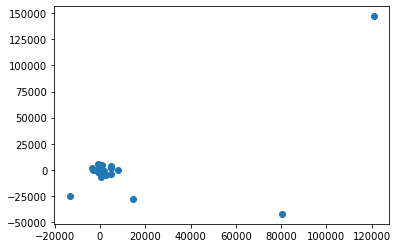

<Figure size 432x288 with 0 Axes>

In [291]:
plt.scatter(fourirer.real,fourirer.imag)
plt.figure()

<Figure size 432x288 with 0 Axes>

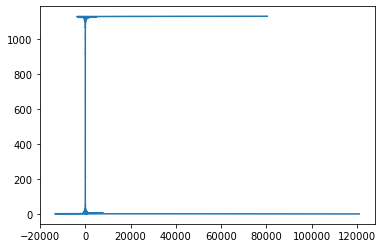

<Figure size 432x288 with 0 Axes>

In [292]:
plt.plot(fourirer.real, range(len(fourirer.real)))
plt.figure()

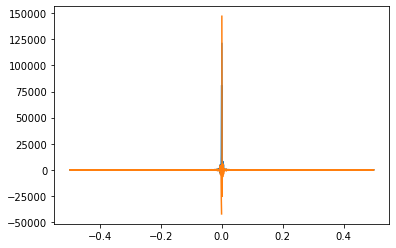

In [360]:
tc_complex = []

for x,y in tc:
    tc_complex.append(x + 1j * y)
tc_complex = np.array(tc_complex)


sp = np.fft.fft(tc_complex)
freq = np.fft.fftfreq(tc_complex.shape[-1])
plt.plot(freq, sp.real, freq, sp.imag)

[120995.        +147059.j         -13419.34657757 -25433.95447873j
   1005.28172092  +5021.9806946j  ...  -3728.49279469  +2175.77148439j
  14570.12327891 -27696.09076846j  80355.85593717 -42173.9368769j ]
[ 0.          0.00088574  0.00177148 ... -0.00265722 -0.00177148
 -0.00088574]


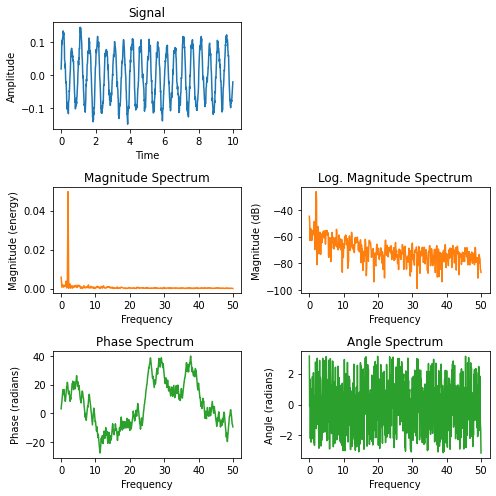

In [361]:
import matplotlib.pyplot as plt
import numpy as np


np.random.seed(0)

dt = 0.01  # sampling interval
Fs = 1 / dt  # sampling frequency
t = np.arange(0, 10, dt)

# generate noise:
nse = np.random.randn(len(t))
r = np.exp(-t / 0.05)
cnse = np.convolve(nse, r) * dt
cnse = cnse[:len(t)]

s = 0.1 * np.sin(4 * np.pi * t) + cnse  # the signal

sp = np.fft.fft(tc_complex)
freq = np.fft.fftfreq(tc_complex.shape[-1])
print(sp)
print(freq)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))

# plot time signal:
axes[0, 0].set_title("Signal")
axes[0, 0].plot(t, s, color='C0')
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Amplitude")

# plot different spectrum types:
axes[1, 0].set_title("Magnitude Spectrum")
axes[1, 0].magnitude_spectrum(s, Fs=Fs, color='C1')

axes[1, 1].set_title("Log. Magnitude Spectrum")
axes[1, 1].magnitude_spectrum(s, Fs=Fs, scale='dB', color='C1')

axes[2, 0].set_title("Phase Spectrum ")
axes[2, 0].phase_spectrum(s, Fs=Fs, color='C2')

axes[2, 1].set_title("Angle Spectrum")
axes[2, 1].angle_spectrum(s, Fs=Fs, color='C2')

axes[0, 1].remove()  # don't display empty ax

fig.tight_layout()
plt.show()

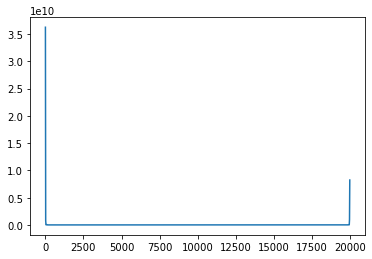

In [369]:
sampling_rate = 40000

time = np.arange(0, 10, 1/sampling_rate)

data = np.sin(2*np.pi*6*time) + np.random.randn(len(time))


sp = np.fft.fft(tc_complex)
freq = np.fft.fftfreq(tc_complex.shape[-1])



fourier_transform = np.fft.fft(tc_complex)

abs_fourier_transform = np.abs(fourier_transform)

power_spectrum = np.square(abs_fourier_transform)

frequency = np.linspace(0, sampling_rate/2, len(power_spectrum))

plt.plot(frequency, power_spectrum)

(70.0, 170.0)

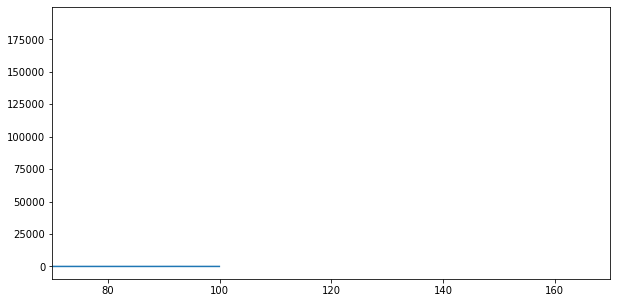

In [381]:
samples = tc_complex.shape[-1]
sample_frequency = 200000  # 200 kHz
sample_interval = 1 / sample_frequency

signal_spectrum = np.fft.fftshift(np.fft.fft(tc_complex))
freqs = np.fft.fftshift(np.fft.fftfreq(samples, d=sample_interval))
plt.figure(figsize=(10,5))
plt.plot(freqs / 1e3, np.abs(signal_spectrum))  # in kHz
plt.xlim(70, 170)